In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Convert to DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [3]:
# Add Target (Disease Progression) as a new column
df["Disease_Progression"] = diabetes.target

# Show first 5 rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease_Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
diabetes = datasets.load_diabetes()

In [5]:
X = diabetes.data        # All 10 features
y = diabetes.target

In [6]:
df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease_Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
df = pd.concat([X, y], axis=1)  # Combine features + target
print("Dataset Shape:", df.shape)
print(df.head())

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

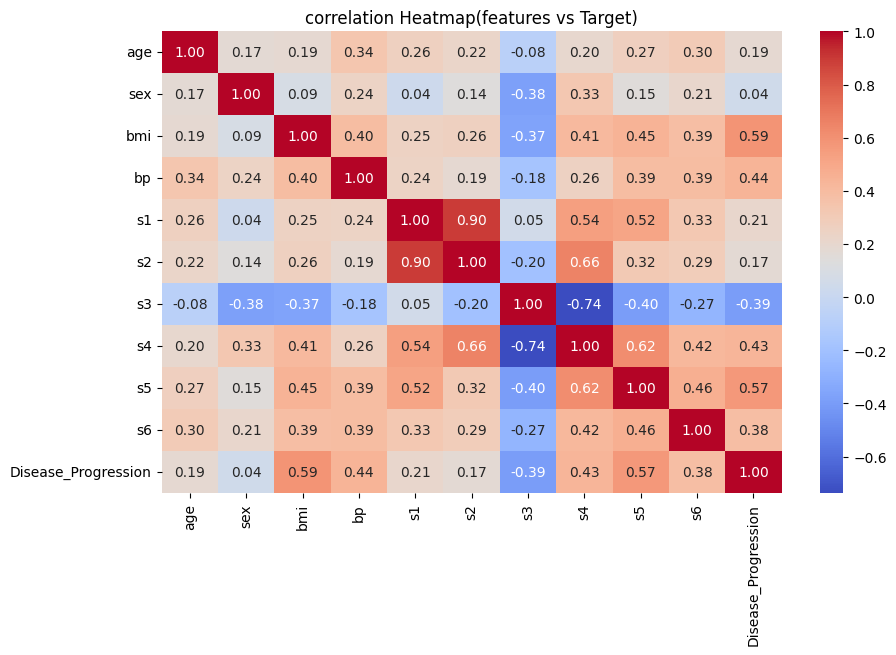

In [9]:
plt.figure(figsize=(10,6))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("correlation Heatmap(features vs Target)")
plt.show()

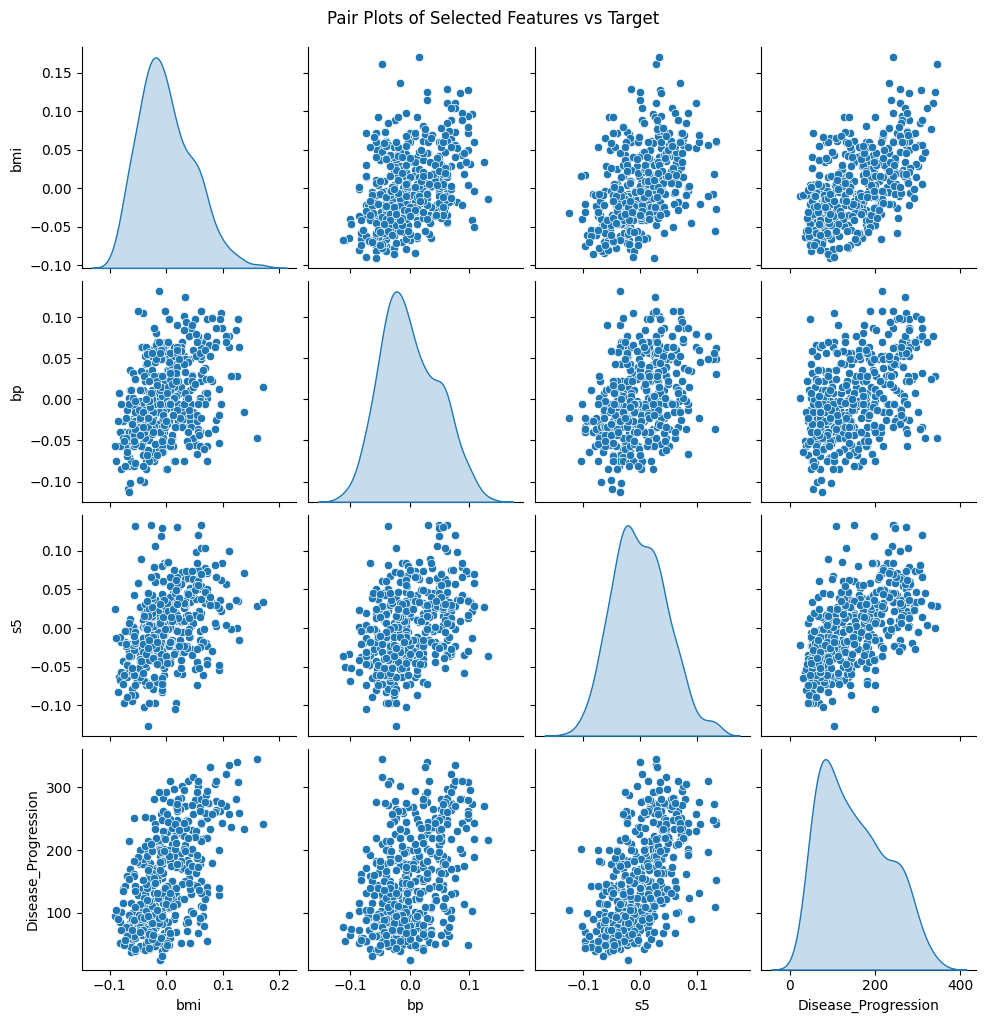

In [10]:
# Select some important features + target
selected_features = ["bmi", "bp", "s5", "Disease_Progression"]

# Pair plots
sns.pairplot(df[selected_features], diag_kind="kde")
plt.suptitle("Pair Plots of Selected Features vs Target", y=1.02)
plt.show()


In [11]:
# 1. Load dataset
diabetes = datasets.load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)  # 10 features
y = pd.Series(diabetes.target, name="target")                   # Target


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

In [16]:
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)
print("R² Score:", R2)

Mean Squared Error (MSE): 2900.193628493482
Root Mean Squared Error (RMSE): 53.85344583676593
R² Score: 0.4526027629719195


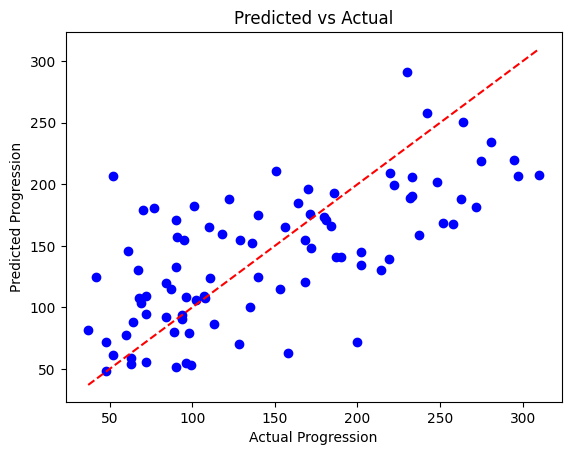

In [17]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title("Predicted vs Actual")
plt.show()

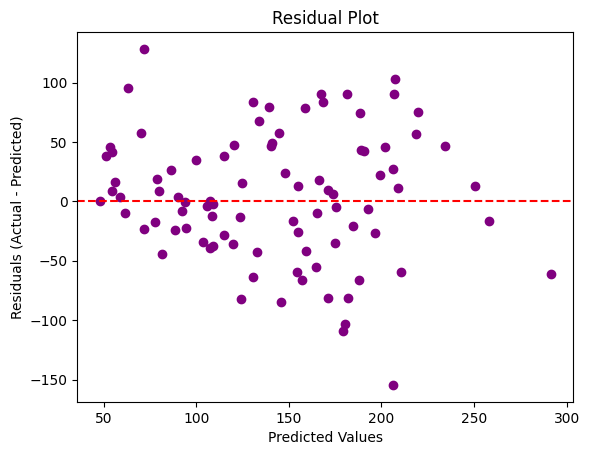

In [18]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


In [19]:
# ------------------------------------------------------
# 8. Find the most contributing variable
# ------------------------------------------------------
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

In [20]:
# Sort by absolute coefficient value (importance)
coefficients["AbsCoefficient"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="AbsCoefficient", ascending=False)

print("\nFeature Importance (by coefficient size):")
print(coefficients)

top_feature = coefficients.iloc[0]
print(f"\n👉 Most contributing variable: {top_feature['Feature']} "
      f"(Coefficient = {top_feature['Coefficient']:.4f})")


Feature Importance (by coefficient size):
  Feature  Coefficient  AbsCoefficient
4      s1  -931.488846      931.488846
8      s5   736.198859      736.198859
2     bmi   542.428759      542.428759
5      s2   518.062277      518.062277
3      bp   347.703844      347.703844
7      s4   275.317902      275.317902
1     sex  -241.964362      241.964362
6      s3   163.419983      163.419983
9      s6    48.670657       48.670657
0     age    37.904021       37.904021

👉 Most contributing variable: s1 (Coefficient = -931.4888)
